In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import tkinter as tk
import numpy as np

from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import xgboost as xgb
from sklearn.metrics import r2_score, mean_absolute_error

In [ ]:
from google.colab import files

data = files.upload()

Saving solar_data.csv to solar_data (2).csv


In [ ]:
data.head()

AttributeError: ignored

In [ ]:
# Load the solar data
solar_data = pd.read_csv("solar_data.csv")

# Split the data into training and testing sets (80/20 split)
train_data = solar_data.sample(frac=0.8, random_state=42)
test_data = solar_data.drop(train_data.index)

# Split the data into training and testing sets (80/20 split)
train_data = solar_data.sample(frac=0.8, random_state=42)
test_data = solar_data.drop(train_data.index)

# Train an XGBoost regression model on the training data
regressor = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
regressor.fit(train_data[['Latitude', 'Longitude', 'Altitude', 'Month', 'Hour', 'Humidity', 'AmbientTemp', 'Wind.Speed', 'Visibility', 'Pressure', 'Cloud.Ceiling']], train_data['PolyPwr'])

# Use the trained model to predict solar power output for the test data
test_data['Predicted Power'] = regressor.predict(test_data[['Latitude', 'Longitude', 'Altitude', 'Month', 'Hour', 'Humidity', 'AmbientTemp', 'Wind.Speed', 'Visibility', 'Pressure', 'Cloud.Ceiling']])

# Calculate the R-squared value and MAE for the predictions
r2 = r2_score(test_data['PolyPwr'], test_data['Predicted Power'])
mae = mean_absolute_error(test_data['PolyPwr'], test_data['Predicted Power'])
print(f"R-squared value: {r2}")
print(f"MAE: {mae}")

R-squared value: 0.5049654442935767
MAE: 3.8310495541285086


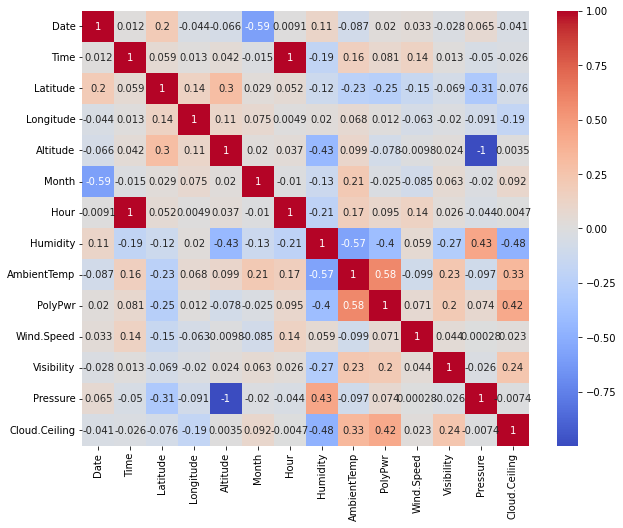

In [ ]:
# Compute pairwise correlations between columns
corr_matrix = solar_data.corr()

# Making a heat map
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True)

# Show the plot
plt.show()

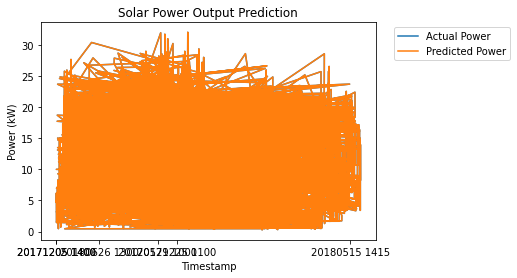

In [ ]:
# Make a line graph that compares the predicted and actual power values
plt.plot(test_data['Timestamp'], test_data['PolyPwr'], label='Actual Power')
plt.plot(test_data['Timestamp'], test_data['PolyPwr'], label='Predicted Power')
plt.xlabel('Timestamp')
plt.ylabel('Power (kW)')
plt.title('Solar Power Output Prediction')

# Move the legend to outside the graph
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

# Set the x-axis tick labels to show only a few labels
xticks = [test_data['Timestamp'].iloc[0]] + list(test_data['Timestamp'].iloc[::1000])
plt.xticks(xticks)

plt.show()

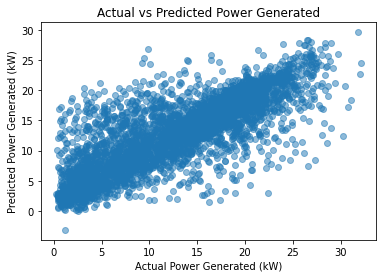

In [ ]:
# Create a scatter plot of predicted vs actual power
plt.scatter(test_data['PolyPwr'], test_data['Predicted Power'], alpha=0.5)

# Set the x and y axis labels
plt.xlabel('Actual Power Generated (kW)')
plt.ylabel('Predicted Power Generated (kW)')

# Set the title of the plot
plt.title('Actual vs Predicted Power Generated')

# Show the plot
plt.show()

In [ ]:
temp = float(input("Enter temperature (in °C): "))
humidity = float(input("Enter relative humidity (in %): "))
wind_speed = float(input("Enter wind speed (in m/s): "))

predicted_power = regressor.predict([[temp, humidity, wind_speed]])
print(f"Predicted power output: {predicted_power[0]:.2f} kW")

plt.show()

Enter temperature (in °C): 13
Enter relative humidity (in %): 30
Enter wind speed (in m/s): 6.66
Predicted power output: 113.04 kW


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
